# Homework 8 : Linear / Nonlinear Classification 

**INDIVIDUAL HOMEWORK** The homework is not collaborative anymore. Please respect the academic integrity. **Remember: if you get caught on cheating, you get F.**

Each subproblem is worth 10 pts.  All cells are marked with instructions to insert your code.  Please complete all cells as directed.

**What to turn in**:
 -  Please print the notebook containing the answers and results into a pdf file (you can use `File - Print`). Submit this pdf file to the main homework entry in gradescope. Be sure to locate your answers for each problem when you submit, as ususal. In the worst case where you cannot print it into a pdf file somehow, you can create a Microsoft word document and then copy-paste screenshots showing your code and output parts by parts.
 -  You also need to submit this jupyter notebook file filled with your answers in the code entry in gradescope.

**Description**:
This homework will study 3-class classification in  the famous "Iris" dataset.  The dataset was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear classifier to distinguish the species from each other. We will do the same using classifiers that we have learned.
![img](img/features2.jpg)

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

## Problem 1 : Load / Explore Data 

### (a)

Because this dataset is so well-known, Scikit-Learn includes a special function for loading it, which is provided below.  Do the following in the cell below:
  * Load the data and create a Train / Test split with 25% test data (train_test_split() function)
  * For the above, make sure to use the provided random state so that results are repeatable
  * Display the training inputs (you can use function display())

Note: You will need the feature names later on.  It is helpful at this point to store them in a set using the DataFrame.colums property.

In [2]:
# use this random state for train/test split
random_state=1234

iris = datasets.load_iris(as_frame=True)
X = iris.data
y = iris.target
print(type(X))
print(type(y))
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
features = np.array(X_train.columns)
display(X_train)
display(Y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
93,5.0,2.3,3.3,1.0
36,5.5,3.5,1.3,0.2
68,6.2,2.2,4.5,1.5
32,5.2,4.1,1.5,0.1
...,...,...,...,...
143,6.8,3.2,5.9,2.3
116,6.5,3.0,5.5,1.8
53,5.5,2.3,4.0,1.3
38,4.4,3.0,1.3,0.2


22     0
93     1
36     0
68     1
32     0
      ..
143    2
116    2
53     1
38     0
47     0
Name: target, Length: 112, dtype: int64

### (b)

Now we will explore our feature distributions.  In the cell below, use the Pandas DataFrame plot feature to plot the density of each feature in the training data.

[ Documentation - Pandas - DataFrame.plot ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

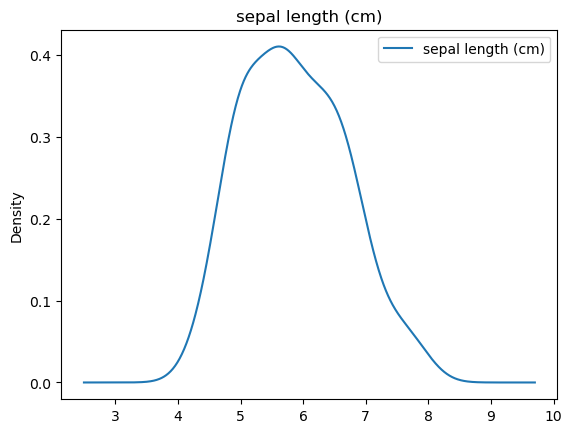

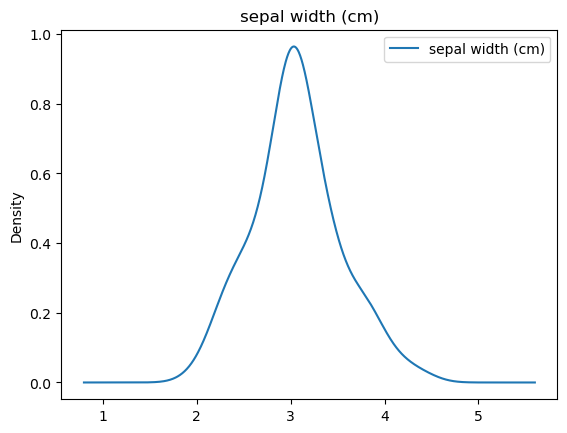

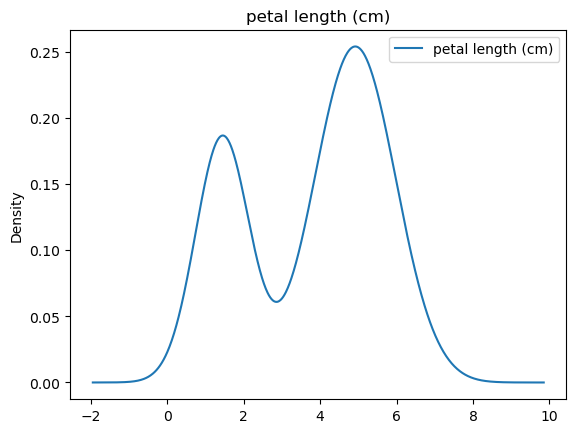

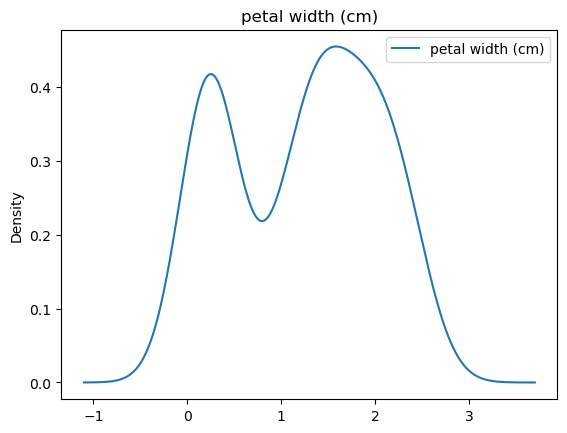

In [3]:
for f in features:
    ax = pd.DataFrame(X_train[f]).plot(kind='density')
    ax.set_title(f)

### (c)

Sometimes it is better to look at distributions of each feature plotted together.  In the cell below produce a boxplot (use plt.boxplot()) of each feature in the training data.  **Make sure to rotate X-tick labels 45-degrees so they are readable.**

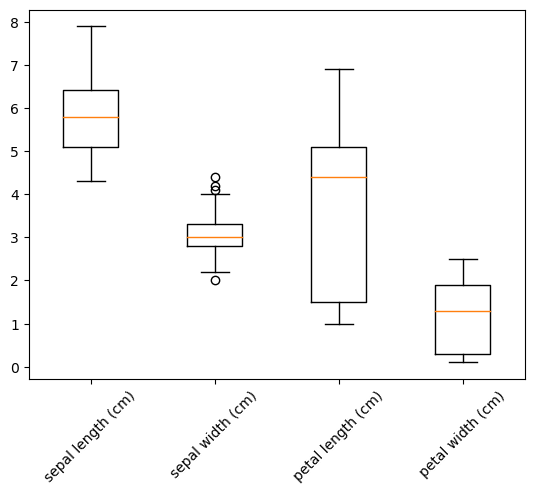

In [4]:
plt.boxplot(X_train, labels=features)
plt.xticks(rotation = 45)
plt.show()

### (d)

Now let's see how well we can separate classes from each pair of features.  In the cell below produce a scatterplot of **every pair of features** in the training data.  There will be 6 scatterplots in all.  Make sure to follow these instructions:
  * Color each marker red, green, or blue depending on the true class label
  * Use **numpy.corrcoef** to compute the correlation coefficient of each feature
  * Title each plot with the correlation coefficient
  * Label each axis using the corresponding feature name

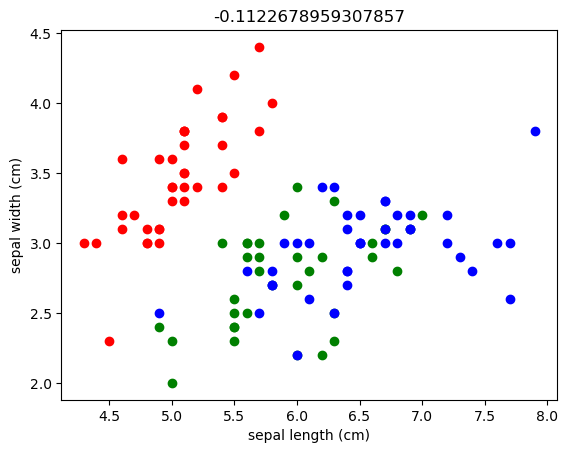

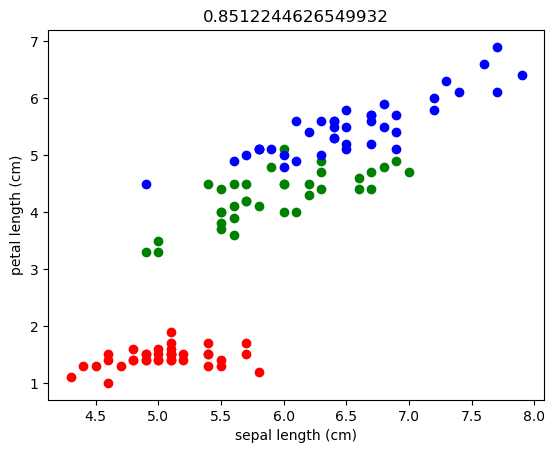

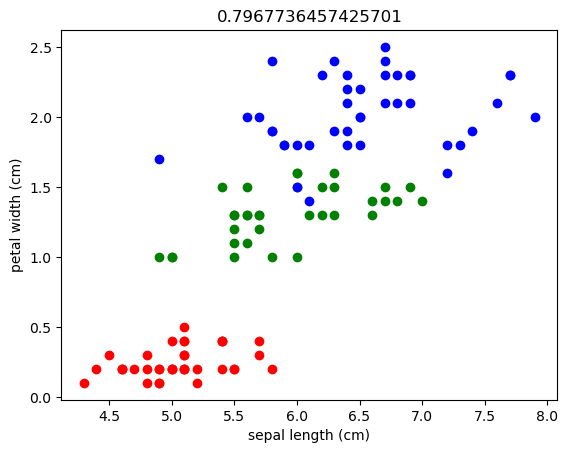

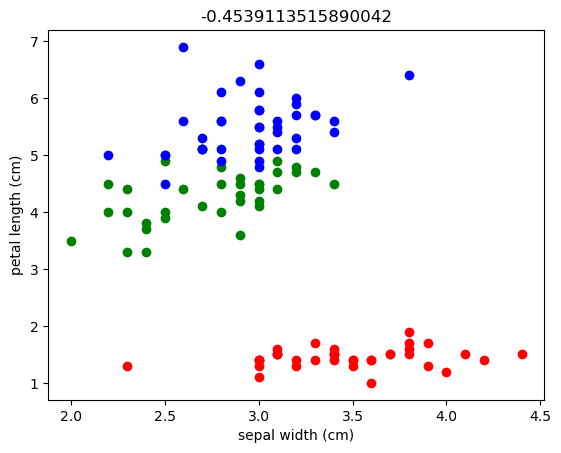

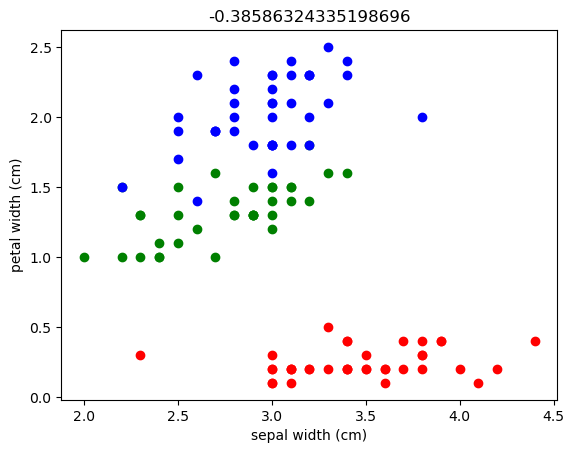

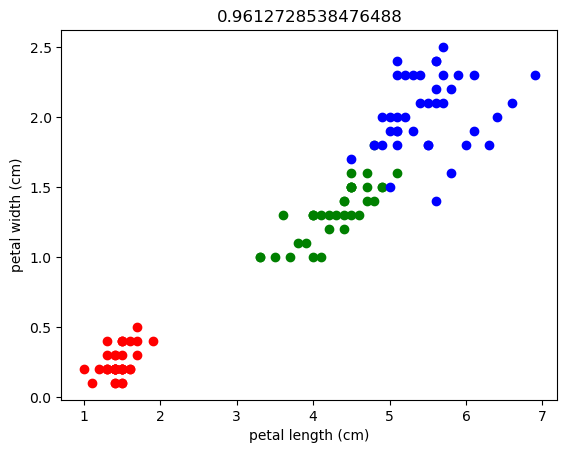

In [5]:
for i in range(len(features)):
    for j in range(i+1, len(features)):
        fig, ax = plt.subplots()
        ax.scatter(X_train[features[i]][ Y_train == 0 ], X_train[features[j]][ Y_train == 0 ], c='r')
        ax.scatter(X_train[features[i]][ Y_train == 1 ], X_train[features[j]][ Y_train == 1 ], c='g')
        ax.scatter(X_train[features[i]][ Y_train == 2 ], X_train[features[j]][ Y_train == 2 ], c='b')
        ax.set_xlabel(features[i])
        ax.set_ylabel(features[j])
        corr = np.corrcoef(X_train[features[i]], X_train[features[j]])
        ax.set_title(corr[0,1])
 


## Problem 2 : Train a logistic regression classifier 

### (a)

Now we will look at finding the best feature out of all the features. To do this, you will preform Cross Validation of Logistic Regression. We will break this into subproblems to walk through it. In the cell do the following:
* Using LogisticRegressionCV perform 5-fold cross validation to train on each feature
* For each run use Matplotlib errorbar() to plot the average +/- standard deviation of error versus regularization coefficient (the property LogisticRegressionCV.Cs_) -- there should be 4 plots in total
* Set plot X-label with the feature name (make the x-axis in the logarithmic scale using ax.set_xscale('log')), and Y-label "Accuracy"
* Title each plot with the maximum achieved accuracy score
* Report the best accuracy from cross-validation
* Finally, report the best performing feature and save it for later

Make sure to set the following properties in LogisticRegressionCV:
* cv=5
* max_iter=1e4
* random_state=0
* multi_class='multinomial'
* Cs=10

[Documentation - Scikit-Learn - LogisticRegressionCV](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

{0: array([[0.34782609, 0.34782609, 0.65217391, 0.69565217, 0.73913043,
        0.69565217, 0.69565217, 0.69565217, 0.69565217, 0.69565217],
       [0.34782609, 0.34782609, 0.56521739, 0.60869565, 0.7826087 ,
        0.65217391, 0.65217391, 0.65217391, 0.65217391, 0.65217391],
       [0.36363636, 0.36363636, 0.68181818, 0.59090909, 0.59090909,
        0.63636364, 0.63636364, 0.63636364, 0.63636364, 0.63636364],
       [0.36363636, 0.36363636, 0.54545455, 0.54545455, 0.59090909,
        0.63636364, 0.72727273, 0.72727273, 0.72727273, 0.72727273],
       [0.36363636, 0.36363636, 0.68181818, 0.68181818, 0.72727273,
        0.81818182, 0.81818182, 0.81818182, 0.81818182, 0.81818182]]), 1: array([[0.34782609, 0.34782609, 0.65217391, 0.69565217, 0.73913043,
        0.69565217, 0.69565217, 0.69565217, 0.69565217, 0.69565217],
       [0.34782609, 0.34782609, 0.56521739, 0.60869565, 0.7826087 ,
        0.65217391, 0.65217391, 0.65217391, 0.65217391, 0.65217391],
       [0.36363636, 0.36363636, 

dict_keys([0, 1, 2])

(5, 10)

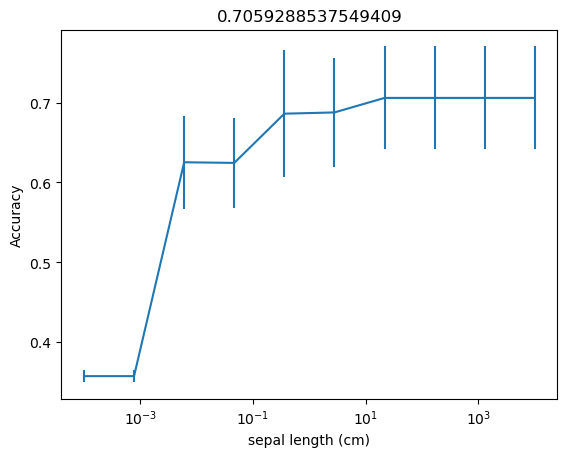

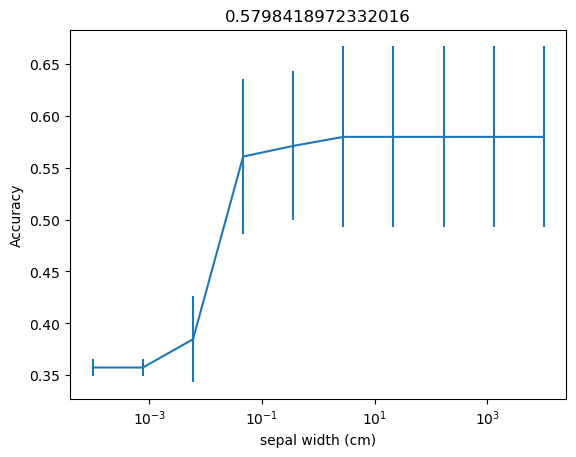

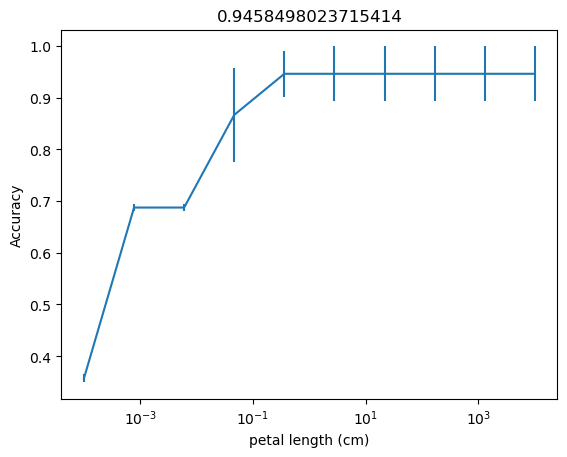

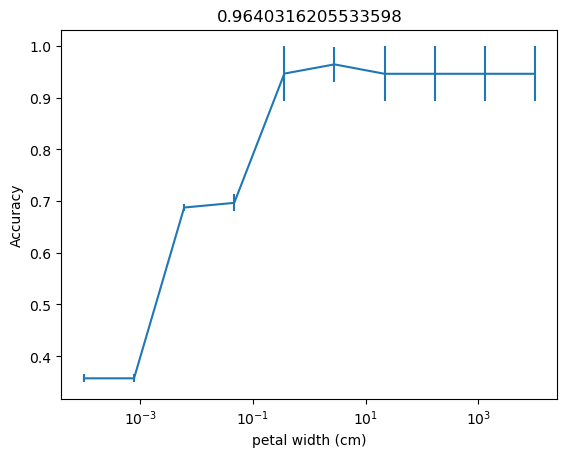

In [8]:
means = np.zeros(len(features))
std = np.zeros(len(features))
cs = np.zeros((10, len(features)))
for idx, f in enumerate(features):
    cv = LogisticRegressionCV(
        cv=5,
        Cs=10, 
        random_state=0,
        multi_class='multinomial'
    ).fit(X_train[f].values.reshape(-1,1), Y_train)
    cs[:,idx] = cv.Cs_
    
    #print(cv.Cs_)
    #print(len(cv.scores_))
    #print(cv.scores_[0].shape)
    print(cv.scores_)
    #print(cv.scores_[0].mean(axis=0))
    print('\n\n')   
    fig, ax = plt.subplots()
    ax.errorbar(cv.Cs_, cv.scores_[0].mean(axis=0), yerr=cv.scores_[0].std(axis=0))
    ax.set_xlabel(f)
    ax.set_ylabel('Accuracy')
    ax.set_xscale('log')
    ax.set_title(max( cv.scores_[0].mean(axis=0) ))


display(cv.scores_.keys())
display(cv.scores_[0].shape)


### (b)

Now lets look at all pairs of features.  The cell below provides a function plotLogreg2feat() to visualize the learned classifier for a pair of features.  This function will draw the decision boundaries for each of the three classes, which will give us a better picture of what's going on.  In the cell below that do the following:
* Loop over every pair of features (there are 6 pairs total)
* Using LogisticRegressionCV perform 5-fold cross validation to train a classifier on the pair of features
* Make sure to use **the same cross validation options as the previous experiment**
* Using plotLogreg2feat plot the learned classifier
* Title each plot with the maximum average accuracy from cross validation

In [9]:
def plotLogreg2feat(X, featname_1, featname_2, model):
    '''
    INPUTS:
      X - Input DataFrame (assumes Nx2 for N data points and 2 features)
      featname_1, featname_2 - String containing feature names
      model - Fitted LogisticRegressionCV model
      
    OUTPUTS:
      ax - Returns figure axis object
    '''
    
    # make grid
    x_min, x_max = X[featname_1].min() - 0.5*X[featname_1].std(), X[featname_1].max() + 0.5*X[featname_1].std()
    y_min, y_max = X[featname_2].min() - 0.5*X[featname_2].std(), X[featname_2].max() + 0.5*X[featname_2].std()
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.figure(1, figsize=(4, 3))
    fig, ax = plt.subplots()
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    #plt.scatter(X_train[features[i]][ Y_train == 0 ], X_train[features[j]][ Y_train == 0 ], c='r')
    #plt.scatter(X_train[features[i]][ Y_train == 1 ], X_train[features[j]][ Y_train == 1 ], c='g')
    #plt.scatter(X_train[features[i]][ Y_train == 2 ], X_train[features[j]][ Y_train == 2 ], c='b')

    ax.scatter(X[featname_1][ y == 0 ], X[featname_2][ y == 0 ], c='r')
    ax.scatter(X[featname_1][ y == 1 ], X[featname_2][ y == 1 ], c='g')
    ax.scatter(X[featname_1][ y == 2 ], X[featname_2][ y == 2 ], c='b')

    ax.set_xlabel(featname_1)
    ax.set_ylabel(featname_2)
    

    #plt.xlim(xx.min(), xx.max())
    #plt.ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    return ax

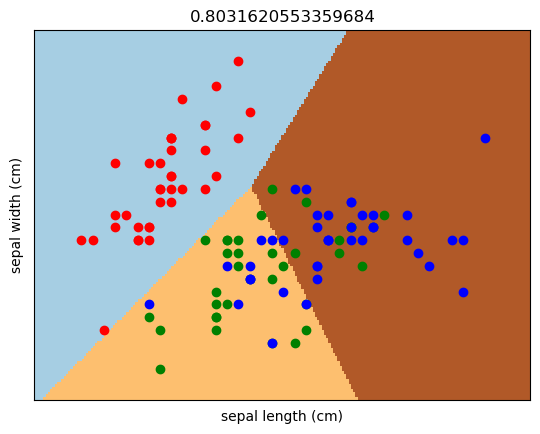

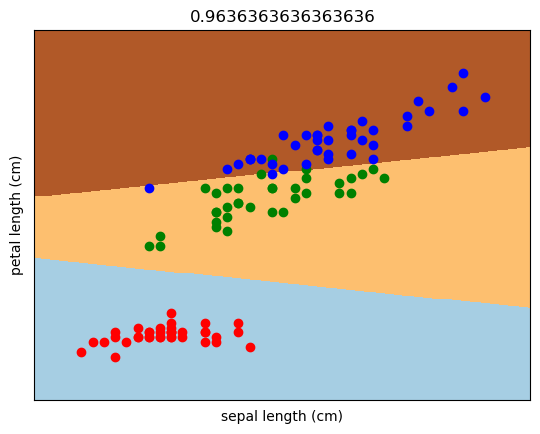

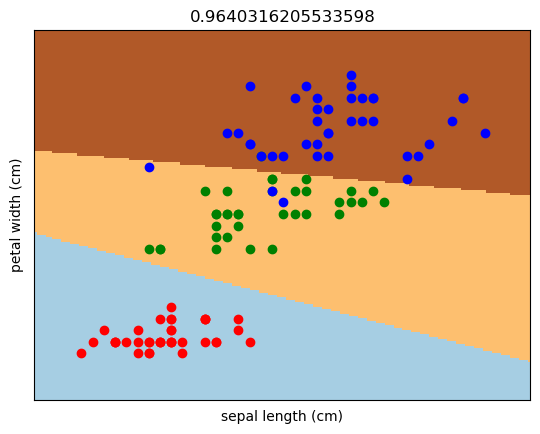

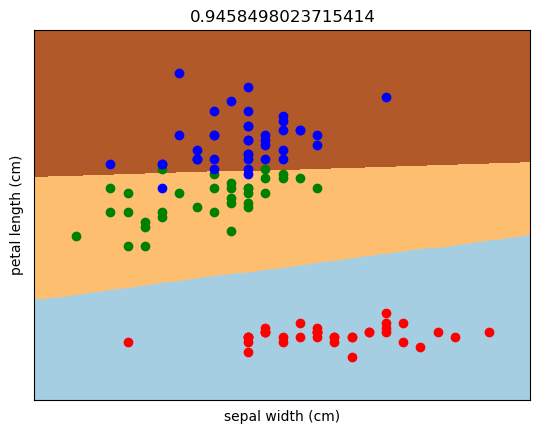

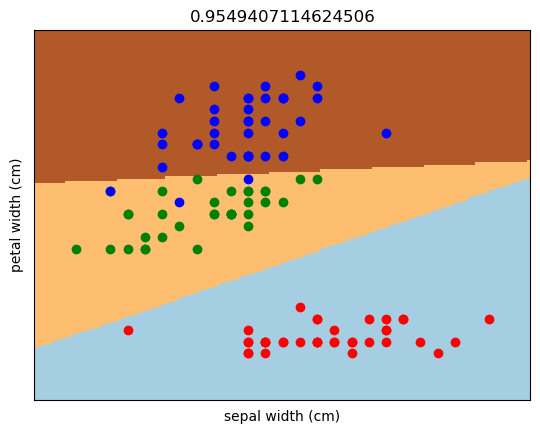

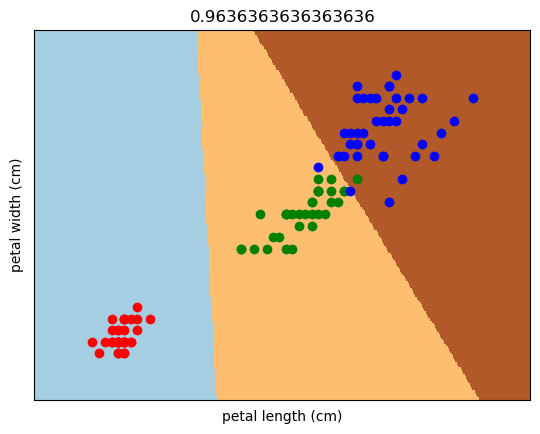

In [10]:
for i in range(len(features)-1):
    for j in range(i+1, len(features)):
        cv = LogisticRegressionCV(cv=5, Cs=10, random_state=0, multi_class='multinomial')        
        cv.fit(X_train[features[[i,j]]], Y_train)        
        acc = cv.score(X_test[features[[i,j]]], Y_test)
        ax = plotLogreg2feat(X_train, features[i], features[j], cv)
        ax.set_title(max(cv.scores_[0].mean(axis=0)))
          

plt.show()

### (c) 

Surprisingly, adding pairs of features doesn't seem to improve things.  Let's try training on all features.  In the cell below:
* Perform 5-fold cross validation (using all the same parameters as before) to train a logistic regression classifier on all features
* Report the maximum of the average scores.

In [11]:
lr = LogisticRegressionCV(cv=5, Cs=10, random_state=0, multi_class='multinomial')
lr.fit(X_train,Y_train)
print(max(lr.scores_[0].mean(axis=0)))

0.9636363636363636


If your results are the same as mine, the maximum score over all features is the same as over the best single feature. 

## Problem 3 : Support Vector Machine 
We have trained several logistic regression classifiers, all of which achieve an a cross-validation accuracy well into the 90% range.  In an effort to see if we can do better, let's train one lass classifier--a support vector machine.  For this classifier we will introduce a nonlinear tranformation using the Radial Basis kernel function.  In the cell be low do the following:
* Using Numpy.logspace create a logarithmically spaced set of 100 regularization coefficient in the range (1e-4, 1e4) 
* For each coefficient define a support vector classifier with kernel='rbf' and set the regularization coefficient (C=coefficient)
* Perform 5-fold cross validation (e.g. using cross_val_score)
* Plot the average accuracy versus regularization coefficient and report the maximum accuracy and best coefficient
* Make sure to set the plot X-scale to 'log' and label axes and title

[ Documentation - Scikit-Learn - svm.SVC ](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC.score)

0.9727272727272727


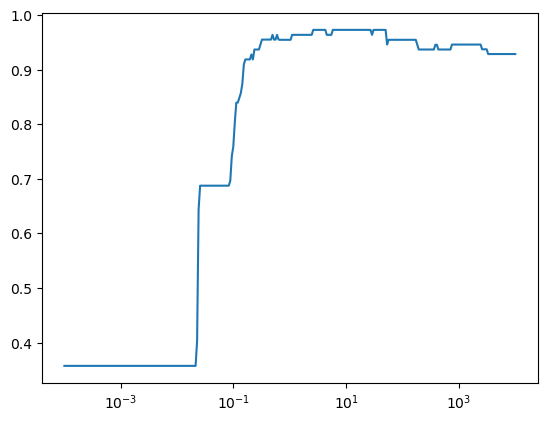

In [10]:
Cs = np.logspace(-4, 4, 300)
best_score = -np.Inf
best_C = 0
all_scores = np.zeros(len(Cs))
for idx, c in enumerate(Cs):
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X_train, Y_train, cv=5)
    all_scores[idx] = np.mean(scores)
    if np.mean(scores) > best_score:
        best_score = np.mean(scores)
        best_C = c
print(best_score)
plt.xscale('log')
plt.plot(Cs, all_scores)

# Train and save classifier
svc_rbf = SVC(kernel='rbf', C=best_C).fit(X_train, Y_train)

My results show slightly higher accuracy under the SVM classifier.  However, cross_val_score does not use the same cross validation splits as the built-in cross validation of LogisticRegressionCV (which randomizes splits).  So we shall see...

## Problem 4 : Evaluate on test 
Now we will evaluate all classifiers on the test data.  Take the best regression classifier and the best SVM classifier (with previously chosen parameters), train them, and evaluate accordingly.  For each classifier report:
  * Test accuracy
  * Confusion matrix
  * Results of classification_report
  
We have only left a single cell below.  Feel free to insert additional cells and arrange output as you see fit.  Make sure it is readable.  Feel free to explore any additional visualizations or metrics.

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# for the regression one with one feature
reg = LogisticRegressionCV(cv=5,random_state=0,multi_class='multinomial',Cs=10).fit(X_train[["petal width (cm)"]], Y_train) #training and evaluating
Y_pred =reg.predict(X_test[["petal width (cm)"]])
acc=accuracy_score(Y_test, Y_pred)
print("accuracy",acc)
print("confusian matrix\n",confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
# for SVM one
sv= SVC(kernel = 'rbf',gamma = 'scale', C=1.0002302850208247)
sv.fit(X_train,Y_train)#training and evaluating
Y_pred =sv.predict(X_test)
acc=accuracy_score(Y_test, Y_pred)
print("accuracy",acc)
print("confusian matrix\n",confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

accuracy 0.9473684210526315
confusian matrix
 [[13  0  0]
 [ 0 14  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.93      0.93        15
           2       0.90      0.90      0.90        10

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

accuracy 0.9736842105263158
confusian matrix
 [[13  0  0]
 [ 0 14  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

